In [8]:
import os
import pyxdf # xdf file importation
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray

from my_functions import *
from my_filters import *


In [9]:
# if pwd is SRC  change to root
print("Current working directory: ", os.getcwd())
if os.path.basename(os.getcwd()) == "SRC":
    os.chdir("..")
print("Current working directory: ", os.getcwd())
print(os.path.basename(os.getcwd()))

Current working directory:  c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio
Current working directory:  c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio
Stage_Signal_Physio


In [10]:
# Define the xdf file of interest
xdf_input_filename="001_MolLud_20201112_1_c.xdf"
#xdf_input_filename="020_DesMar_20211129_1_c.xdf"

xdf_input_filepath=os.path.normpath("DAT/INPUT/"+xdf_input_filename)

In [11]:
# definition of the EEG channels' names
channels_dict = {"Channel_1": "C4",
                "Channel_2": "FC2",
                "Channel_3": "FC6",
                "Channel_4": "CP2",
                "Channel_5": "C3",
                "Channel_6": "FC1",
                "Channel_7": "FC5",
                "Channel_8": "CP1"}

In [12]:
EEG_data=retrieve_stream_data_from_xdf(xdf_input_filepath=xdf_input_filepath,stream_type="EEG")

EEG_timestamps = EEG_data["data"]["timestamps"]-EEG_data["data"]["timestamps"][0]
EEG_srate = EEG_data["infos"]["sample_rate"]["effective"]
print(type(EEG_srate))
EEG_units = np.unique(EEG_data["infos"]["channels"]["units"])[0]

EEG_amplitudes_centered = detrend_signals(EEG_data["data"]["time_series"])
EEG_amplitudes_rereferenced = rereference_signals(input_signals=EEG_amplitudes_centered)
EEG_amplitudes_centered_filtered,_,_ = filter_signal(input_signals=EEG_amplitudes_rereferenced,
                                            sample_rate=EEG_srate,order=8,cutofffreq=(5,100,50))

Accessing stream: 
Type: 'EEG' | Name: 'LSLOutletStreamName-EEG'
<class 'float'>
input_signals shape:
 (221938, 8)
input_signals mean per signal:
 [27897.195 26144.139 28026.402 35319.527 31324.672 24827.713 32372.799
 29788.95 ]
input_signals shape:(221938, 8)
input_signals whole mean:13.818697929382324
LOW_CUTOFF_FREQ_THEORETICAL=5,HIGH_CU-TOFF_FREQ_THEORETICAL=100
LOW_CUTOFF_FREQ_CORRECTED=4.732,HIGH_CUTOFF_FREQ_CORRECTED=104.203
NOTCH_CUTOFF_FREQ=50
Filtered signal shape: (221938, 8)


In [13]:
mouse_marker_times_labels = create_marker_times_labels_array2(xdf_input_filepath=xdf_input_filepath)
mouse_marker_times_labels[:,0] -= EEG_data["data"]["timestamps"][0] #make times start in reference to the first EEG timestamp instead of unix epoch.

Accessing stream: 
Type: 'Markers' | Name: 'MouseToNIC'


In [14]:
nearest_markers_array = nearest_timestamps_array_finder(signal_times_stamps=EEG_timestamps,markers=mouse_marker_times_labels)
epoch_limits=(0,4)


MARKERS LEN: 12


In [15]:
eeg_signals_epoched=extract_data_epochs_from_all_signals(signals=EEG_amplitudes_centered_filtered,sample_rate=EEG_srate,
                                          markers_labels_times=nearest_markers_array,select_events=(100,111),epoch_limits=epoch_limits)
print(eeg_signals_epoched)
a=eeg_signals_epoched.keys()


221938
Epoch limits relative to events (in sec): start: 0s - end: 4s
Epoch limits relative to events (in samples): n_points_before_marker: 0.0 - n_points_after_marker: 1999.990908174066
Event type : 111 ------------ epochs :
first_seg_coord: 13659 - second_seg_coord: 15658
first_seg_coord: 33660 - second_seg_coord: 35659
first_seg_coord: 53662 - second_seg_coord: 55661
first_seg_coord: 82834 - second_seg_coord: 84833
first_seg_coord: 102836 - second_seg_coord: 104835
first_seg_coord: 122837 - second_seg_coord: 124836
signal_segments shape: (2000, 6)
time_segments shape: (2000, 6)
Event type : 100 ------------ epochs :
first_seg_coord: 23660 - second_seg_coord: 25659
first_seg_coord: 43661 - second_seg_coord: 45660
first_seg_coord: 63663 - second_seg_coord: 65662
first_seg_coord: 92835 - second_seg_coord: 94834
first_seg_coord: 112837 - second_seg_coord: 114836
first_seg_coord: 132838 - second_seg_coord: 134837
signal_segments shape: (2000, 6)
time_segments shape: (2000, 6)
221938
Epoch

[-4.52137077 -3.01356957 -2.25475748 ...  1.95197284  1.7132774
  3.19383246]


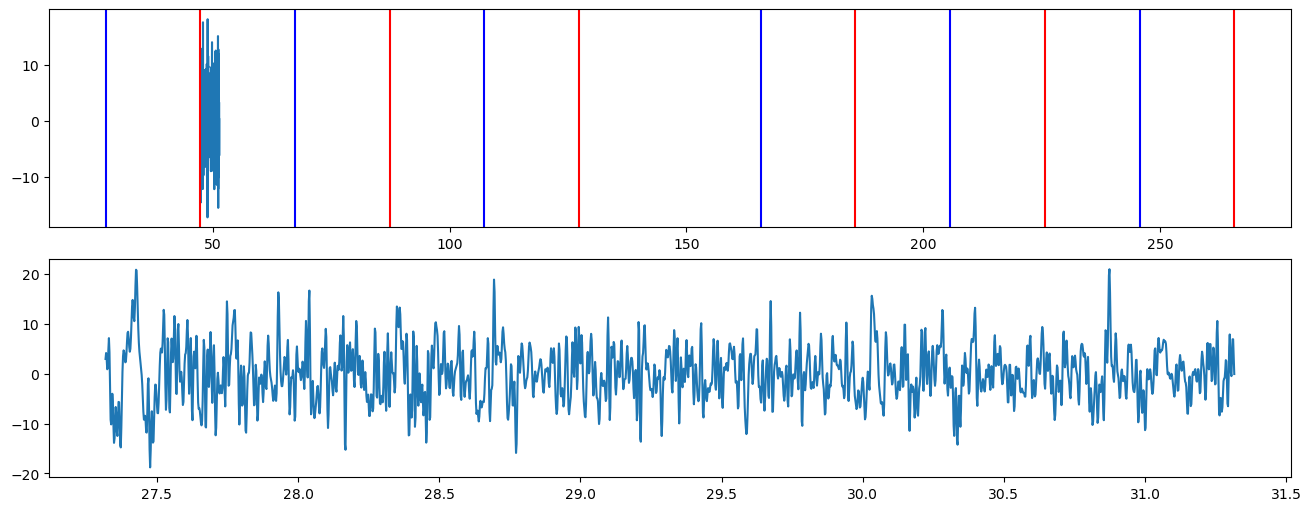

In [16]:
print(eeg_signals_epoched["Channel_1"]["Epochs"]["time_signals"]["label_100"]["signal_segments"][:,0])
figure,axis=plt.subplots(2,layout="constrained",figsize=(13,5))
axis[0].plot(eeg_signals_epoched["Channel_1"]["Epochs"]["time_signals"]["label_100"]["time_segments"][:,0],eeg_signals_epoched["Channel_1"]["Epochs"]["time_signals"]["label_100"]["signal_segments"][:,0])
axis[1].plot(eeg_signals_epoched["Channel_1"]["Epochs"]["time_signals"]["label_111"]["time_segments"][:,0],eeg_signals_epoched["Channel_1"]["Epochs"]["time_signals"]["label_111"]["signal_segments"][:,0])

show_markers2(plot_type=axis[0],markers_times_array=mouse_marker_times_labels)


In [17]:
len(eeg_signals_epoched["Channel_1"]["Epochs"]["time_signals"]["label_111"]["signal_segments"])
eeg_signals_epochs_PSDs = compute_psds_for_each_epoch_all_signals(input_dict=eeg_signals_epoched,sample_rate=EEG_srate,
                                                                  nfft=len(eeg_signals_epoched["Channel_1"]["Epochs"]["time_signals"]["label_111"]["signal_segments"]))
eeg_signals_epochs_PSDs["Channel_1"]["Epochs"]["PSDs"]["label_111"]["PSD_frequencies"].shape

segments shapes to psd - (2000, 6)
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
segments shapes to psd - (2000, 6)
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
segments shapes to psd - (2000, 6)
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
segments shapes to psd - (2000, 6)
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
segments shapes to psd - (2000, 6)
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
segments shapes to psd - (2000, 6)
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
segments shapes to psd - (2000, 6)
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
segments shapes to psd - (2000, 6)
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
segments shapes to psd - (2000, 6)
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
segments shapes to psd - (2000, 6)
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
nfft: 2000
n

(1001, 6)

(0.0, 60.0)

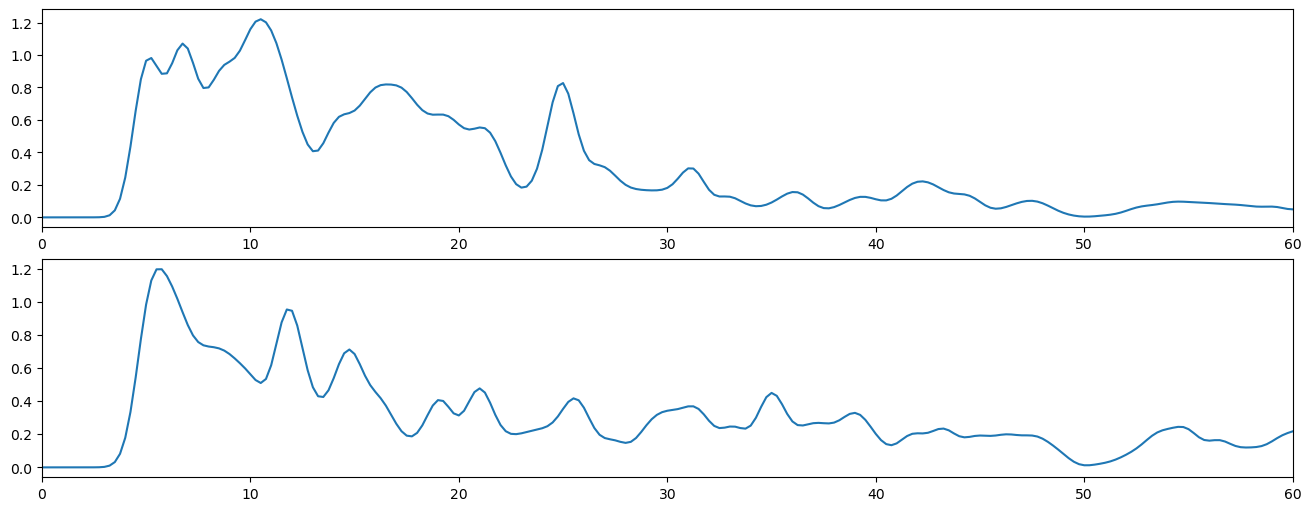

In [18]:
figure,axis=plt.subplots(2,layout="constrained",figsize=(13,5))
axis[0].plot(eeg_signals_epochs_PSDs["Channel_1"]["Epochs"]["PSDs"]["label_100"]["PSD_frequencies"][:,0],
             eeg_signals_epochs_PSDs["Channel_1"]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"][:,0])
axis[1].plot(eeg_signals_epochs_PSDs["Channel_1"]["Epochs"]["PSDs"]["label_111"]["PSD_frequencies"][:,0],
             eeg_signals_epochs_PSDs["Channel_1"]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"][:,0])
axis[0].set_xlim(0,60)
axis[1].set_xlim(0,60)

In [19]:
f= eeg_signals_epochs_PSDs["Channel_1"]["Epochs"]["PSDs"]["label_100"]["PSD_frequencies"][:,0]
rest= eeg_signals_epochs_PSDs["Channel_1"]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"]
task=eeg_signals_epochs_PSDs["Channel_1"]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"]

# Rounding step to tackle imprecision in PSD results (on non-existing frequency components)
round_button=False
if round_button:
    rest=np.around(rest, decimals=2, out=None)
    task=np.around(task, decimals=2, out=None)


    #after_marker_n=np.fix(after_marker_n)
    #before_marker_n=np.fix(before_marker_n)
rest=np.sqrt(rest)
task=np.sqrt(task)

diff_PSDs=np.subtract(rest,task)

#ERSP formula
#diff_PSDs=np.round(diff_PSDs,decimals=2)

ersp=np.divide(diff_PSDs,rest)*100 #returns nans if divided by 0
ersp=np.nan_to_num(ersp, copy=False, nan=0.0) #manage nan values


Text(0.5, 0, 'Frequencies(Hz)')

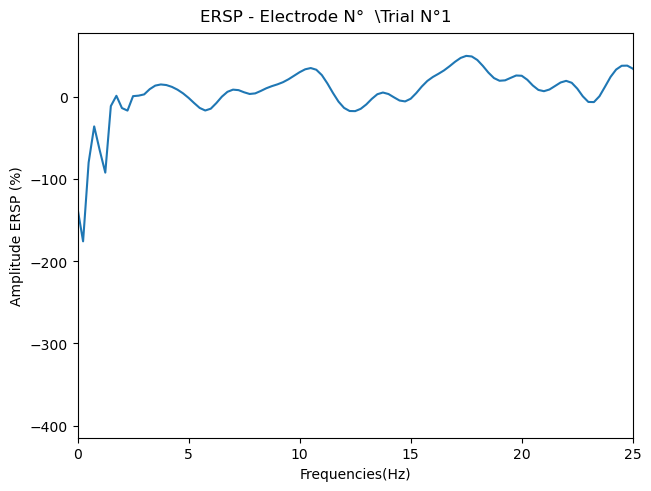

In [20]:
epoch_num=1
epoch_index=epoch_num-1

figure,axis=plt.subplots(layout="constrained")
figure.suptitle(f"ERSP - Electrode N°  \Trial N°{epoch_num}")
axis.plot(f,ersp[:,epoch_index])
axis.set_xlim(0,25)
axis.set_ylabel("Amplitude ERSP (%)")
axis.set_xlabel("Frequencies(Hz)")
